# Cross Validation
## Validation

- 隨機資料對半分成訓練集(train set)和驗證集(validation set)
- 配適線性模型 mpg 對 horsepower 多項式
- 不同多項式的 validation error 畫出

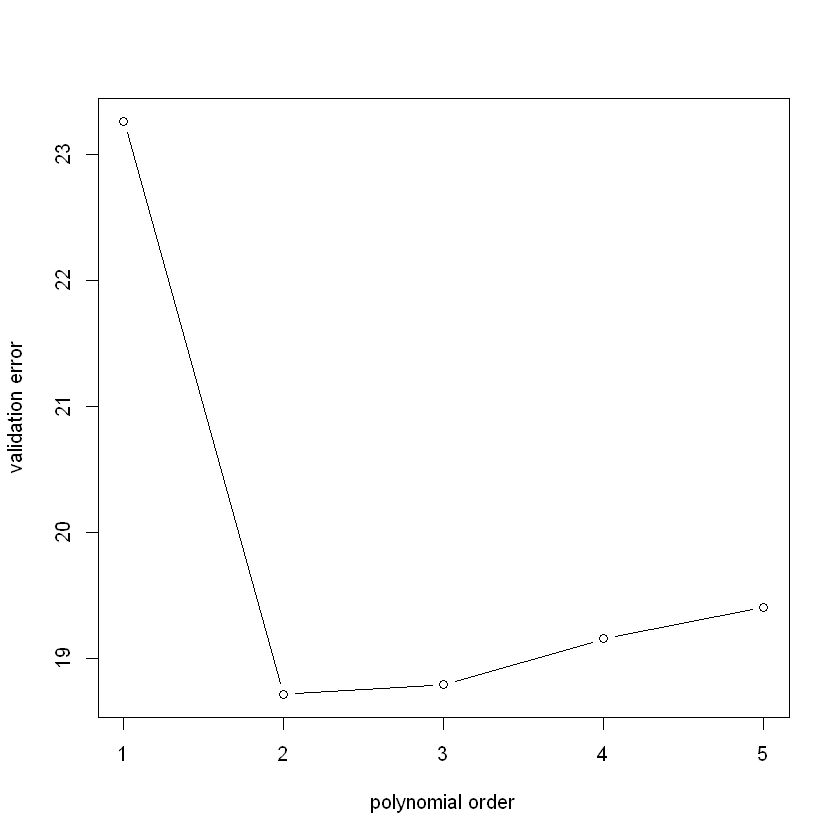

In [1]:
library(ISLR)
set.seed(1)
# 從 1 到 392 抽樣 196 當成 training set
train=sample(1:392 ,196)
poly_validation_error=rep(0,5);
mpg=Auto$mpg
for(i in 1:5){
    # mpg 對 horsepower 配適合 i 階多項式
    lm.fit=lm(mpg~poly(horsepower ,i) ,data=Auto ,subset =train )
    # mpg 預測值
    validation_pred=predict(lm.fit,Auto)
    validation_mpg=mpg
    # 計算 validation error 
    poly_validation_error[i]=mean((validation_mpg-validation_pred)[-train]^2)
}
plot(1:5,poly_validation_error,xlab="polynomial order",ylab="validation error",type="b")

- 隨機分成訓練和測試集的結果，會影響 validation error 
- 重複不同的驗證集，能得出不同的 validation error
- 缺點: validation error 的結果不太穩定

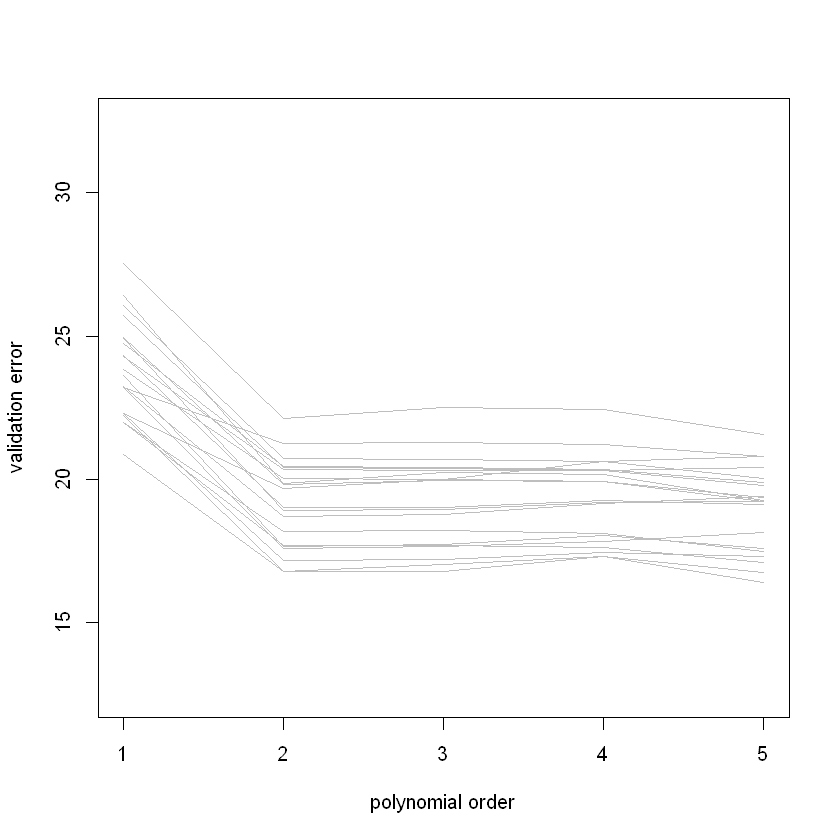

In [2]:
library(ISLR)
for(tmp_seed in 1:20){
    set.seed(tmp_seed)
    # 從 1 到 392 抽樣 196 當成 training set
    train=sample(1:392 ,196)
    poly_validation_error=rep(0,5);
    mpg=Auto$mpg
    for(i in 1:5){
        # mpg 對 horsepower 配適合 i 階多項式
        lm.fit=lm(mpg~poly(horsepower ,i) ,data=Auto ,subset =train )
        # mpg 預測值
        validation_pred=predict(lm.fit,Auto)
        validation_mpg=mpg
        # 計算 validation error 
        poly_validation_error[i]=mean((validation_mpg-validation_pred)[-train]^2)
    }
    if(tmp_seed==1){
        plot(1:5,poly_validation_error,xlab="polynomial order",ylab="validation error",type="l",col="grey",ylim=c(12.5,32.5))
    }else{
        lines(1:5,poly_validation_error,col="grey")
    }
}


## Leave-One-Out Cross Validation(LOOCV)
- 同樣配適線性模型 mpg 對 horsepower 多項式
- 不同多項式的 loocv error 畫出
- 優點: 結果穩定，只有單一值
- 缺點: 計算相比 validation 耗時

[1] 5

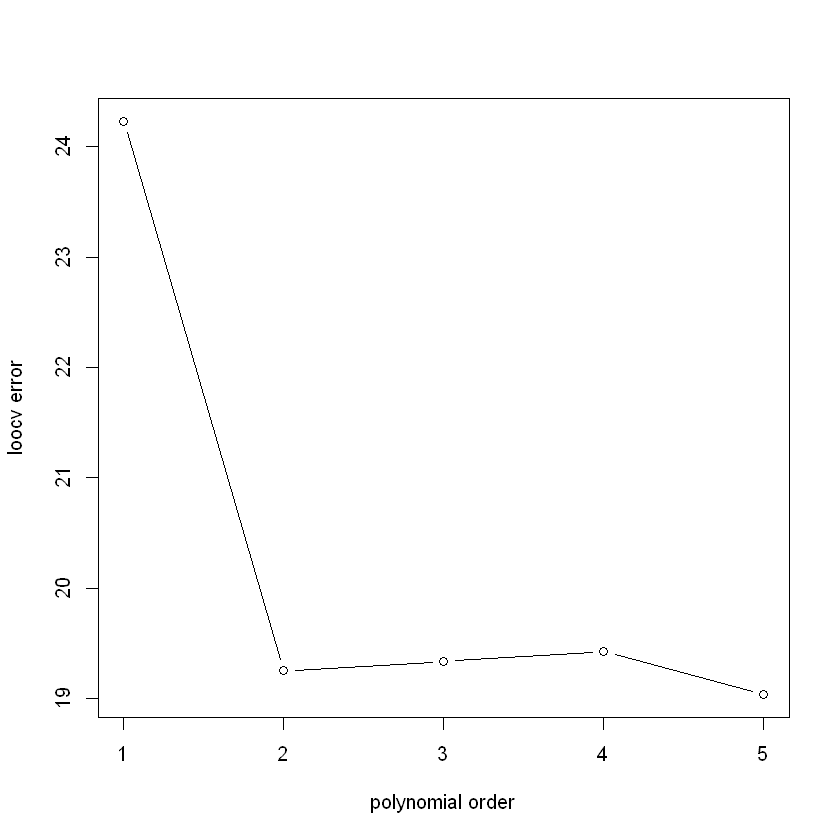

In [3]:
library(boot)
loocv.err=rep(0,5)
for(i in 1:5){
    glm.fit=glm(mpg~poly(horsepower,i) ,data=Auto)
    loocv.err[i]=cv.glm(Auto,glm.fit)$delta[1]
}
plot(1:5,loocv.err,xlab="polynomial order",ylab="loocv error",type="b")
which.min(loocv.err)

## K-fold Cross Validation ( K-fold CV )
- 選定 K=10,隨機將資料分割成 10 組
- 同樣配適線性模型 mpg 對 horsepower 多項式
- 不同多項式的 K-fold CV error 畫出

[1] 2

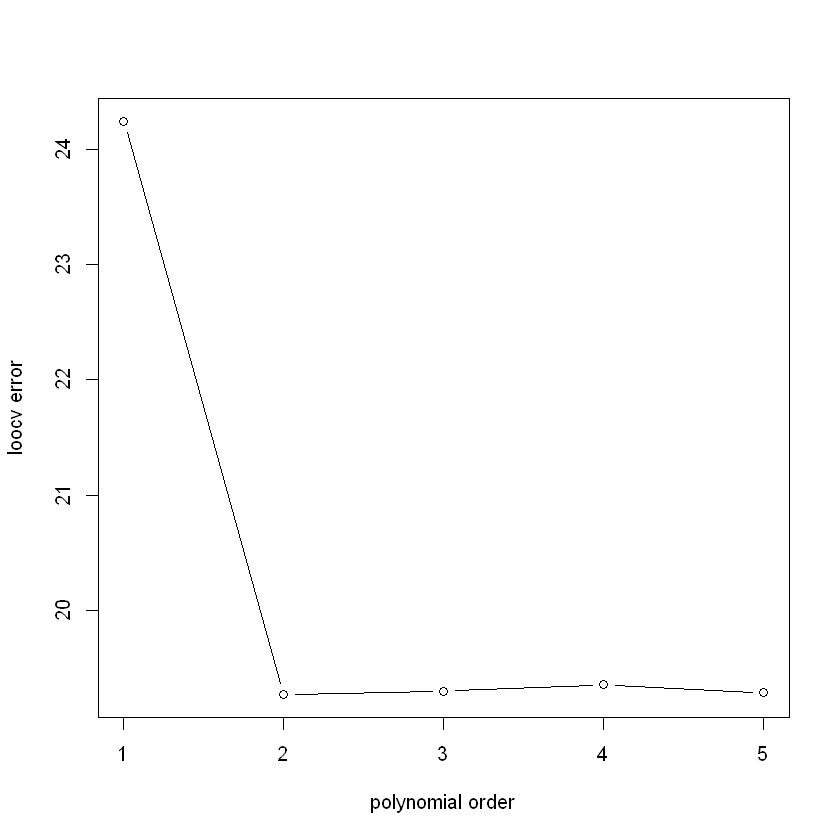

In [4]:
k.cv.err=rep(0,5)
for(i in 1:5){
    glm.fit=glm(mpg~poly(horsepower,i) ,data=Auto)
    k.cv.err[i]=cv.glm(Auto,glm.fit,K=10)$delta[1]
}
plot(1:5,k.cv.err,xlab="polynomial order",ylab="loocv error",type="b")
which.min(k.cv.err)

- 同樣，隨機分割的結果，會影響 K-fold CV error 
- 重複不同的分割，能得出不同的 K-fold CV error
- 從圖中能觀察 K-fold CV error 結果較 validation 穩定
- 同時 K-fold CV error 耗時也比 loocv 少

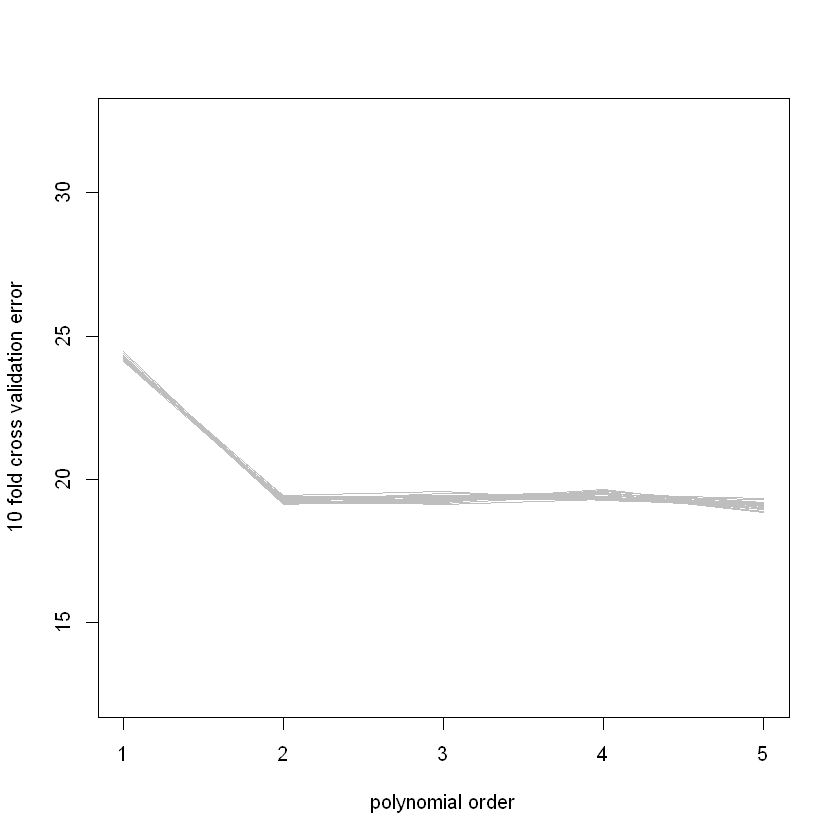

In [5]:
library(ISLR)
for(tmp_seed in 1:20){
    set.seed(tmp_seed)
    k.cv.err=rep(0,5)
    for(i in 1:5){
        glm.fit=glm(mpg~poly(horsepower,i) ,data=Auto)
        k.cv.err[i]=cv.glm(Auto,glm.fit,K=10)$delta[1]
    }
    if(tmp_seed==1){
        plot(1:5,k.cv.err,xlab="polynomial order",ylab="10 fold cross validation error",type="l",col="grey",ylim=c(12.5,32.5))
    }else{
        lines(1:5,k.cv.err,col="grey")
    }
}

# SVM Cross Validation
- SVM 挑選參數可以透過 CV 方式進行挑選

Loading required package: e1071



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
  gamma cost
 0.0625    4

- best performance: 0.02666667 

- Detailed performance results:
    gamma cost      error dispersion
1  0.0625    2 0.04000000 0.03442652
2  0.1250    2 0.03333333 0.04714045
3  0.2500    2 0.03333333 0.04714045
4  0.5000    2 0.05333333 0.05258738
5  1.0000    2 0.06000000 0.04919099
6  2.0000    2 0.06000000 0.03784308
7  0.0625    4 0.02666667 0.03442652
8  0.1250    4 0.03333333 0.04714045
9  0.2500    4 0.04000000 0.04661373
10 0.5000    4 0.05333333 0.05258738
11 1.0000    4 0.06666667 0.04444444
12 2.0000    4 0.07333333 0.04919099
13 0.0625    8 0.04666667 0.04499657
14 0.1250    8 0.03333333 0.04714045
15 0.2500    8 0.03333333 0.04714045
16 0.5000    8 0.06000000 0.04919099
17 1.0000    8 0.06666667 0.05443311
18 2.0000    8 0.07333333 0.04919099
19 0.0625   16 0.04666667 0.04499657
20 0.1250   16 0.04000000 0.03442652
21 0.2500   16 0.05333333 0.06885304


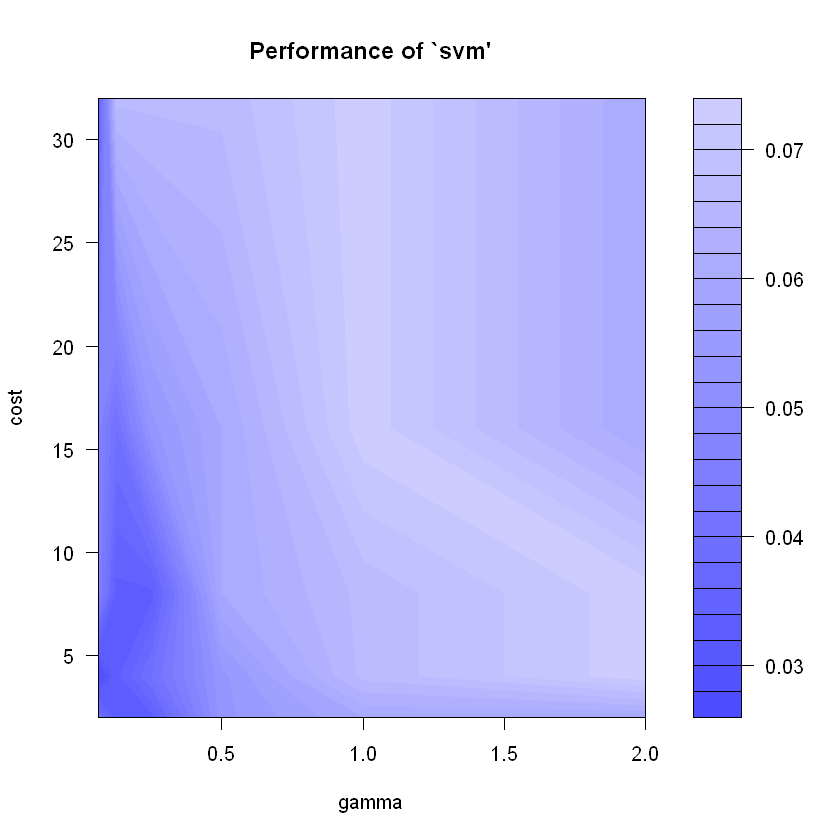

In [6]:
require(e1071)
set.seed(1)
obj <- tune(svm, Species~., data = iris, 
          ranges = list(gamma = 2^(-4:1), cost = 2^(1:5)),kernel="radial")
summary(obj)
plot(obj)

In [7]:
m_svm<-svm(Species~., data = iris,gamma=0.625,cost=4,kernel="radial")
svm_pred=predict(m_svm)
table(iris$Species,svm_pred)
mean(iris$Species==svm_pred)

            svm_pred
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         3
  virginica       0          0        50

[1] 0.98